# Praktikum AI Modul 4
#### Dataset = https://www.kaggle.com/competitions/praktikum-ai-modul-4/data

#### Praktikan :
1. Fathika Afrine Azaruddin - 5027211016

#### Import Library and Load Data

In [1]:
import pandas as pd
import numpy as np
import os
import math
import warnings
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

# Load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [2]:
df_train

,index,Nomor peserta,Nomor keluarga,Bobot,ID Kunjungan FKTP,Tanggal Datang,Tanggal Pulang,Provinsi Faskes,Kepemilikan Faskes,Jenis Faskes,...,Jenis Poli,Segmen Peserta,Diagnosis,Provinsi Faskes Rujukan,Kepemilikan Faskes Rujukan,Jenis Faskes Rujukan,Tipe Faskes Rujukan,Jenis Poli Rujukan,Jenis Kunjungan Faskes,Status Peserta
0,0,73913167.0,73913167,62.487934,137661220P000223,2020-12-12,2020-12-12,Jawa Timur,Swasta,Klinik Pratama,...,POLI UMUM,PBPU,Insulin-dependent diabetes mellitus with coma,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sakit,Belum_Sehat
1,1,187825971.0,187825969,11.345645,478791120P000005,2020-11-02,2020-11-02,DI Yogyakarta,Swasta,Klinik Pratama,...,POLI KIA,Bukan pekerja,Prolonged pregnancy,DI Yogyakarta,Swasta,Puskesmas,RS Swasta Setara Type D,MISSING,Kunjungan sakit,Belum_Sehat
2,2,53940892.0,53940892,122.385887,1135614839,2020-02-04,2020-02-04,DKI Jakarta,PemProv,Puskesmas,...,Konseling,PBI APBD,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehat,Sehat
3,3,8671315.0,52616999,85.407494,232430219Y001189,2019-02-24,2019-02-24,Jambi,Swasta,Klinik Pratama,...,POLI UMUM,PPU,"Acute upper respiratory infection, unspecified",NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sakit,Belum_Sehat
4,4,19451459.0,79653335,62.295994,1299223191,2020-08-18,2020-08-18,Sumatera Selatan,PemKab,Puskesmas,...,Home-Visit,PBI APBN,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehat,Sehat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,27593643.0,27593643,246.872818,1386139258,2020-11-16,2020-11-16,DI Yogyakarta,Swasta,Klinik Pratama,...,KUNJUNGAN ONLINE,PPU,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehat,Sehat
599996,599996,10710870.0,40481437,76.793205,1212214395,2020-04-06,2020-04-06,Riau,PemKab,Puskesmas,...,Konseling,PBI APBN,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehat,Sehat
599997,599997,57881089.0,57881089,152.956100,811422104,2019-03-27,2019-03-27,Sumatera Selatan,PemKab,Puskesmas,...,Konseling,PBI APBN,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehat,Sehat
599998,599998,103851967.0,23829633,12.303092,161380319Y000408,2019-03-23,2019-03-23,Jawa Tengah,PemKab,Puskesmas,...,POLI UMUM,PBI APBN,Acute bronchitis,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sakit,Belum_Sehat


In [3]:
df_train.describe()

,index,Nomor peserta,Nomor keluarga,Bobot
count,600000.000000,6.000000e+05,6.000000e+05,600000.000000
mean,299999.500000,8.867371e+07,9.194661e+07,116.050720
std,173205.225094,8.597246e+07,8.473594e+07,198.493949
min,0.000000,2.180000e+02,1.010000e+02,0.548387
25%,149999.750000,3.357260e+07,3.536082e+07,19.224564
50%,299999.500000,6.710180e+07,7.117004e+07,58.835409
75%,449999.250000,1.007081e+08,1.074698e+08,141.820557
max,599999.000000,4.553876e+08,4.553795e+08,30353.421875


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index                       600000 non-null  int64  
 1   Nomor peserta               600000 non-null  float64
 2   Nomor keluarga              600000 non-null  int64  
 3   Bobot                       600000 non-null  float64
 4   ID Kunjungan FKTP           600000 non-null  object 
 5   Tanggal Datang              600000 non-null  object 
 6   Tanggal Pulang              600000 non-null  object 
 7   Provinsi Faskes             600000 non-null  object 
 8   Kepemilikan Faskes          600000 non-null  object 
 9   Jenis Faskes                600000 non-null  object 
 10  Tipe Faskes                 600000 non-null  object 
 11  Tingkat Pelayanan Faskes    600000 non-null  object 
 12  Jenis Poli                  600000 non-null  object 
 13  Segmen Peserta

In [5]:
df_test

,index,Nomor peserta,Nomor keluarga,Bobot,ID Kunjungan FKTP,Tanggal Datang,Tanggal Pulang,Provinsi Faskes,Kepemilikan Faskes,Jenis Faskes,...,Tingkat Pelayanan Faskes,Jenis Poli,Segmen Peserta,Diagnosis,Provinsi Faskes Rujukan,Kepemilikan Faskes Rujukan,Jenis Faskes Rujukan,Tipe Faskes Rujukan,Jenis Poli Rujukan,Jenis Kunjungan Faskes
0,0,63610662.0,63610662,255.907318,479191219P000012,2019-12-13,2019-12-13,Jawa Timur,Swasta,Dokter Umum,...,RJTP,POLI UMUM,Bukan pekerja,"Influenza, virus not identified",NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sakit
1,1,52193774.0,86722228,57.358536,375650319P000281,2019-03-16,2019-03-16,Jawa Tengah,Swasta,Dokter Umum,...,RJTP,POLI UMUM,PPU,Acute nasopharyngitis [common cold],NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sakit
2,2,106515655.0,106515655,242.670731,1279887537,2020-07-15,2020-07-15,Lampung,PemKab,Puskesmas,...,RJTP,KUNJUNGAN ONLINE,PBI APBN,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehat
3,3,35045772.0,35045772,39.499653,196840820P000138,2020-08-11,2020-08-11,Sumatera Selatan,Swasta,Dokter Umum,...,RJTP,POLI UMUM,PPU,Allergic contact dermatitis,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sakit
4,4,10039586.0,10039586,116.082756,739387277,2019-01-09,2019-01-09,Sulawesi Selatan,PemKab,Puskesmas,...,RJTP,Home-Visit,PBI APBN,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,69678726.0,69678726,76.096230,255510520P000205,2020-05-15,2020-05-15,Jawa Timur,PemKab,Puskesmas,...,RJTP,POLI UMUM,PBPU,Insulin-dependent diabetes mellitus with unspe...,Jawa Timur,Pemerintah kabupaten/kota,Puskesmas,RS Kelas C,MISSING,Kunjungan sakit
199996,199996,7274336.0,7274336,65.972824,757904054,2019-01-17,2019-01-17,Maluku,PemKab,Puskesmas,...,RJTP,Home-Visit,PBI APBN,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehat
199997,199997,44524133.0,62343464,7.883807,194080720P000043,2020-07-20,2020-07-20,Riau,Swasta,Dokter Umum,...,RJTP,POLI UMUM,PBPU,Other dermatitis,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sakit
199998,199998,44435086.0,44435086,32.186348,799593712,2019-03-08,2019-03-08,Jawa Barat,PemKab,Puskesmas,...,RJTP,Home-Visit,PBI APBN,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehat


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index                       200000 non-null  int64  
 1   Nomor peserta               200000 non-null  float64
 2   Nomor keluarga              200000 non-null  int64  
 3   Bobot                       200000 non-null  float64
 4   ID Kunjungan FKTP           200000 non-null  object 
 5   Tanggal Datang              200000 non-null  object 
 6   Tanggal Pulang              200000 non-null  object 
 7   Provinsi Faskes             200000 non-null  object 
 8   Kepemilikan Faskes          200000 non-null  object 
 9   Jenis Faskes                200000 non-null  object 
 10  Tipe Faskes                 200000 non-null  object 
 11  Tingkat Pelayanan Faskes    200000 non-null  object 
 12  Jenis Poli                  200000 non-null  object 
 13  Segmen Peserta

In [7]:
df_test.describe()

,index,Nomor peserta,Nomor keluarga,Bobot
count,200000.000000,2.000000e+05,2.000000e+05,200000.000000
mean,99999.500000,8.885809e+07,9.219263e+07,116.741321
std,57735.171256,8.643869e+07,8.509688e+07,213.983383
min,0.000000,3.700000e+02,1.010000e+02,0.765033
25%,49999.750000,3.329344e+07,3.529202e+07,19.329617
50%,99999.500000,6.714019e+07,7.137556e+07,59.249477
75%,149999.250000,1.007290e+08,1.075190e+08,142.240768
max,199999.000000,4.553693e+08,4.553795e+08,23564.787109


#### Exploratory Data Analysis (EDA)

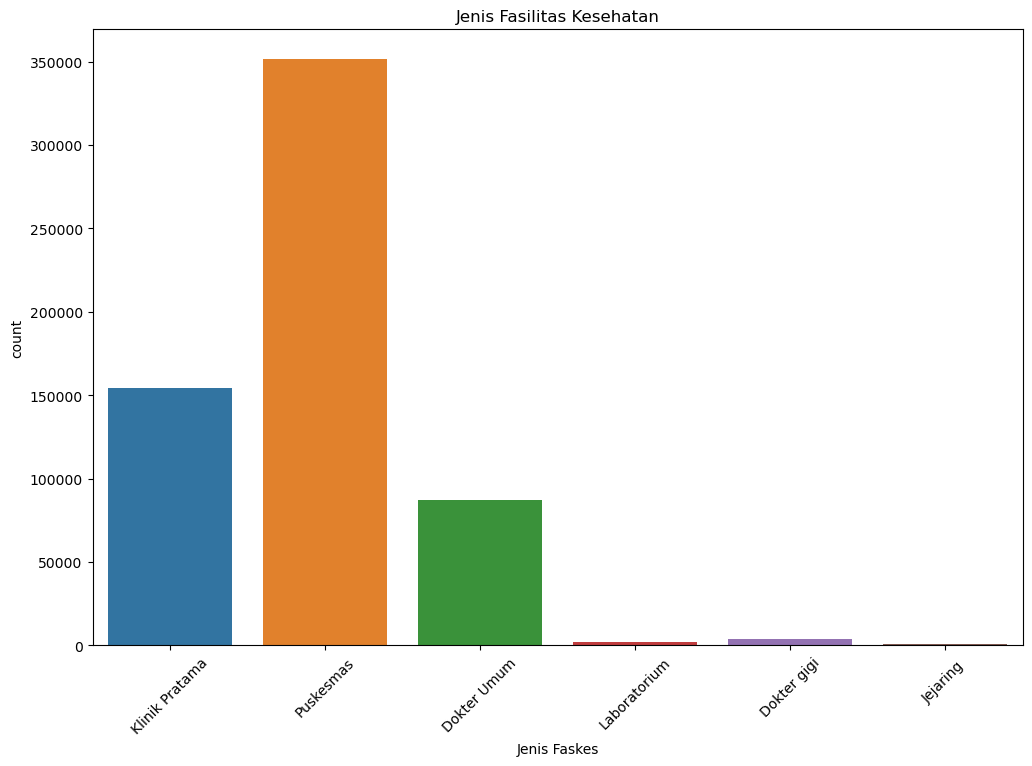

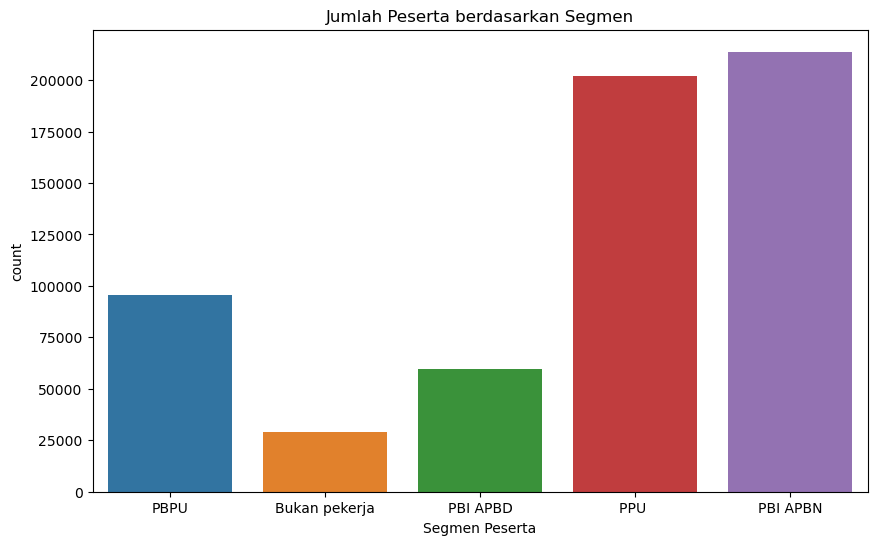

In [8]:
plt.figure(figsize=(12, 8))
sb.countplot(x='Jenis Faskes', data=df_train)
plt.title('Jenis Fasilitas Kesehatan')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sb.countplot(x='Segmen Peserta', data=df_train)
plt.title('Jumlah Peserta berdasarkan Segmen')
plt.show()

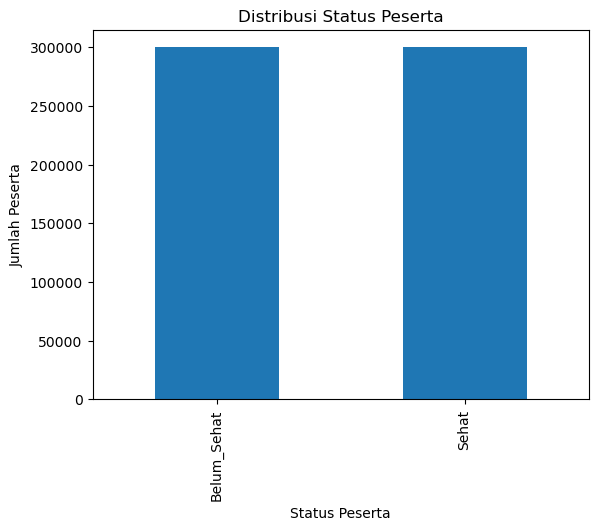

In [9]:
# Contoh visualisasi distribusi 'status_peserta'
df_train['Status Peserta'].value_counts().plot(kind='bar')
plt.title('Distribusi Status Peserta')
plt.xlabel('Status Peserta')
plt.ylabel('Jumlah Peserta')
plt.show()

#### Preprocessing Data

In [10]:
print('Missing Values in Dataset "train.csv"')
df_train.isnull().sum()

Missing Values in Dataset "train.csv"


index                              0
Nomor peserta                      0
Nomor keluarga                     0
Bobot                              0
ID Kunjungan FKTP                  0
Tanggal Datang                     0
Tanggal Pulang                     0
Provinsi Faskes                    0
Kepemilikan Faskes                 0
Jenis Faskes                       0
Tipe Faskes                        0
Tingkat Pelayanan Faskes           0
Jenis Poli                         0
Segmen Peserta                     0
Diagnosis                          0
Provinsi Faskes Rujukan       556677
Kepemilikan Faskes Rujukan         0
Jenis Faskes Rujukan               0
Tipe Faskes Rujukan           556693
Jenis Poli Rujukan                 0
Jenis Kunjungan Faskes             0
Status Peserta                     0
dtype: int64

In [11]:
print('Missing Values in Dataset "test.csv"')
df_test.isnull().sum()

Missing Values in Dataset "test.csv"


index                              0
Nomor peserta                      0
Nomor keluarga                     0
Bobot                              0
ID Kunjungan FKTP                  0
Tanggal Datang                     0
Tanggal Pulang                     0
Provinsi Faskes                    0
Kepemilikan Faskes                 0
Jenis Faskes                       0
Tipe Faskes                        0
Tingkat Pelayanan Faskes           0
Jenis Poli                         0
Segmen Peserta                     0
Diagnosis                          0
Provinsi Faskes Rujukan       185659
Kepemilikan Faskes Rujukan         0
Jenis Faskes Rujukan               0
Tipe Faskes Rujukan           185667
Jenis Poli Rujukan                 0
Jenis Kunjungan Faskes             0
dtype: int64

#### Label Encoder

In [12]:
# Membaca dataset dari file csv
df = pd.DataFrame(df_train)

# Inisialisasi Label Encoder
label_encoder = LabelEncoder()

# Menggunakan Label Encoder untuk mengubah kolom categorical menjadi numerik
categorical_columns = ["Kepemilikan Faskes", "Jenis Faskes", "Tipe Faskes", "Tingkat Pelayanan Faskes", "Segmen Peserta", "Kepemilikan Faskes Rujukan", "Jenis Faskes Rujukan", "Tipe Faskes Rujukan", "Jenis Poli Rujukan", "Jenis Kunjungan Faskes", "Status Peserta"]
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    
# Menampilkan Dataframe setelah Label Encoding
df.head()

,index,Nomor peserta,Nomor keluarga,Bobot,ID Kunjungan FKTP,Tanggal Datang,Tanggal Pulang,Provinsi Faskes,Kepemilikan Faskes,Jenis Faskes,...,Jenis Poli,Segmen Peserta,Diagnosis,Provinsi Faskes Rujukan,Kepemilikan Faskes Rujukan,Jenis Faskes Rujukan,Tipe Faskes Rujukan,Jenis Poli Rujukan,Jenis Kunjungan Faskes,Status Peserta
0,0,73913167.0,73913167,62.487934,137661220P000223,2020-12-12,2020-12-12,Jawa Timur,4,3,...,POLI UMUM,3,Insulin-dependent diabetes mellitus with coma,NaN,8,2,23,1,0,0
1,1,187825971.0,187825969,11.345645,478791120P000005,2020-11-02,2020-11-02,DI Yogyakarta,4,3,...,POLI KIA,0,Prolonged pregnancy,DI Yogyakarta,4,1,18,0,0,0
2,2,53940892.0,53940892,122.385887,1135614839,2020-02-04,2020-02-04,DKI Jakarta,3,5,...,Konseling,1,9999,NaN,8,2,23,1,1,1
3,3,8671315.0,52616999,85.407494,232430219Y001189,2019-02-24,2019-02-24,Jambi,4,3,...,POLI UMUM,4,"Acute upper respiratory infection, unspecified",NaN,8,2,23,1,0,0
4,4,19451459.0,79653335,62.295994,1299223191,2020-08-18,2020-08-18,Sumatera Selatan,2,5,...,Home-Visit,2,9999,NaN,8,2,23,1,1,1


In [13]:
# Membaca dataset dari file csv
df = pd.DataFrame(df_test)

# Inisialisasi Label Encoder
label_encoder = LabelEncoder()

# Menggunakan Label Encoder untuk mengubah kolom categorical menjadi numerik
categorical_columns = ["Kepemilikan Faskes", "Jenis Faskes", "Tipe Faskes", "Tingkat Pelayanan Faskes", "Segmen Peserta", "Kepemilikan Faskes Rujukan", "Jenis Faskes Rujukan", "Tipe Faskes Rujukan", "Jenis Poli Rujukan", "Jenis Kunjungan Faskes"]
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    
# Menampilkan Dataframe setelah Label Encoding
df.head()

,index,Nomor peserta,Nomor keluarga,Bobot,ID Kunjungan FKTP,Tanggal Datang,Tanggal Pulang,Provinsi Faskes,Kepemilikan Faskes,Jenis Faskes,...,Tingkat Pelayanan Faskes,Jenis Poli,Segmen Peserta,Diagnosis,Provinsi Faskes Rujukan,Kepemilikan Faskes Rujukan,Jenis Faskes Rujukan,Tipe Faskes Rujukan,Jenis Poli Rujukan,Jenis Kunjungan Faskes
0,0,63610662.0,63610662,255.907318,479191219P000012,2019-12-13,2019-12-13,Jawa Timur,4,0,...,2,POLI UMUM,0,"Influenza, virus not identified",NaN,8,2,21,1,0
1,1,52193774.0,86722228,57.358536,375650319P000281,2019-03-16,2019-03-16,Jawa Tengah,4,0,...,2,POLI UMUM,4,Acute nasopharyngitis [common cold],NaN,8,2,21,1,0
2,2,106515655.0,106515655,242.670731,1279887537,2020-07-15,2020-07-15,Lampung,2,5,...,2,KUNJUNGAN ONLINE,2,9999,NaN,8,2,21,1,1
3,3,35045772.0,35045772,39.499653,196840820P000138,2020-08-11,2020-08-11,Sumatera Selatan,4,0,...,2,POLI UMUM,4,Allergic contact dermatitis,NaN,8,2,21,1,0
4,4,10039586.0,10039586,116.082756,739387277,2019-01-09,2019-01-09,Sulawesi Selatan,2,5,...,2,Home-Visit,2,9999,NaN,8,2,21,1,1


In [14]:
# Menggunakan One-Hot Encoding untuk mengubah kolom categorical menjadi kolom dummy
categorical_columns = ["Provinsi Faskes", "Jenis Poli", "Provinsi Faskes Rujukan"]
df = pd.get_dummies(df_train, columns=categorical_columns, prefix=categorical_columns)

df.head()

,index,Nomor peserta,Nomor keluarga,Bobot,ID Kunjungan FKTP,Tanggal Datang,Tanggal Pulang,Kepemilikan Faskes,Jenis Faskes,Tipe Faskes,...,Provinsi Faskes Rujukan_Papua Barat,Provinsi Faskes Rujukan_Riau,Provinsi Faskes Rujukan_Sulawesi Barat,Provinsi Faskes Rujukan_Sulawesi Selatan,Provinsi Faskes Rujukan_Sulawesi Tengah,Provinsi Faskes Rujukan_Sulawesi Tenggara,Provinsi Faskes Rujukan_Sulawesi Utara,Provinsi Faskes Rujukan_Sumatera Barat,Provinsi Faskes Rujukan_Sumatera Selatan,Provinsi Faskes Rujukan_Sumatera Utara
0,0,73913167.0,73913167,62.487934,137661220P000223,2020-12-12,2020-12-12,4,3,2,...,0,0,0,0,0,0,0,0,0,0
1,1,187825971.0,187825969,11.345645,478791120P000005,2020-11-02,2020-11-02,4,3,2,...,0,0,0,0,0,0,0,0,0,0
2,2,53940892.0,53940892,122.385887,1135614839,2020-02-04,2020-02-04,3,5,5,...,0,0,0,0,0,0,0,0,0,0
3,3,8671315.0,52616999,85.407494,232430219Y001189,2019-02-24,2019-02-24,4,3,3,...,0,0,0,0,0,0,0,0,0,0
4,4,19451459.0,79653335,62.295994,1299223191,2020-08-18,2020-08-18,2,5,8,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Menggunakan One-Hot Encoding untuk mengubah kolom categorical menjadi kolom dummy
categorical_columns = ["Provinsi Faskes", "Jenis Poli", "Provinsi Faskes Rujukan"]
df = pd.get_dummies(df_test, columns=categorical_columns, prefix=categorical_columns)

df.head()

,index,Nomor peserta,Nomor keluarga,Bobot,ID Kunjungan FKTP,Tanggal Datang,Tanggal Pulang,Kepemilikan Faskes,Jenis Faskes,Tipe Faskes,...,Provinsi Faskes Rujukan_Papua Barat,Provinsi Faskes Rujukan_Riau,Provinsi Faskes Rujukan_Sulawesi Barat,Provinsi Faskes Rujukan_Sulawesi Selatan,Provinsi Faskes Rujukan_Sulawesi Tengah,Provinsi Faskes Rujukan_Sulawesi Tenggara,Provinsi Faskes Rujukan_Sulawesi Utara,Provinsi Faskes Rujukan_Sumatera Barat,Provinsi Faskes Rujukan_Sumatera Selatan,Provinsi Faskes Rujukan_Sumatera Utara
0,0,63610662.0,63610662,255.907318,479191219P000012,2019-12-13,2019-12-13,4,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,52193774.0,86722228,57.358536,375650319P000281,2019-03-16,2019-03-16,4,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,106515655.0,106515655,242.670731,1279887537,2020-07-15,2020-07-15,2,5,8,...,0,0,0,0,0,0,0,0,0,0
3,3,35045772.0,35045772,39.499653,196840820P000138,2020-08-11,2020-08-11,4,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,10039586.0,10039586,116.082756,739387277,2019-01-09,2019-01-09,2,5,8,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Drop categorical column
# Menghapus kolom-kolom yang disebutkan
kolom_dihapus = ['ID Kunjungan FKTP', 'Provinsi Faskes', 'Jenis Poli', 'Diagnosis', 'Provinsi Faskes Rujukan', 'Tanggal Datang', 'Tanggal Pulang']
df_train.drop(columns=kolom_dihapus, inplace=True)

df_train.head()

,index,Nomor peserta,Nomor keluarga,Bobot,Kepemilikan Faskes,Jenis Faskes,Tipe Faskes,Tingkat Pelayanan Faskes,Segmen Peserta,Kepemilikan Faskes Rujukan,Jenis Faskes Rujukan,Tipe Faskes Rujukan,Jenis Poli Rujukan,Jenis Kunjungan Faskes,Status Peserta
0,0,73913167.0,73913167,62.487934,4,3,2,2,3,8,2,23,1,0,0
1,1,187825971.0,187825969,11.345645,4,3,2,2,0,4,1,18,0,0,0
2,2,53940892.0,53940892,122.385887,3,5,5,2,1,8,2,23,1,1,1
3,3,8671315.0,52616999,85.407494,4,3,3,2,4,8,2,23,1,0,0
4,4,19451459.0,79653335,62.295994,2,5,8,2,2,8,2,23,1,1,1


In [17]:
# Drop categorical column
# Menghapus kolom-kolom yang disebutkan
kolom_dihapus = ['ID Kunjungan FKTP', 'Provinsi Faskes', 'Jenis Poli', 'Diagnosis', 'Provinsi Faskes Rujukan', 'Tanggal Datang', 'Tanggal Pulang']
df_test.drop(columns=kolom_dihapus, inplace=True)

df_test.head()

,index,Nomor peserta,Nomor keluarga,Bobot,Kepemilikan Faskes,Jenis Faskes,Tipe Faskes,Tingkat Pelayanan Faskes,Segmen Peserta,Kepemilikan Faskes Rujukan,Jenis Faskes Rujukan,Tipe Faskes Rujukan,Jenis Poli Rujukan,Jenis Kunjungan Faskes
0,0,63610662.0,63610662,255.907318,4,0,1,2,0,8,2,21,1,0
1,1,52193774.0,86722228,57.358536,4,0,1,2,4,8,2,21,1,0
2,2,106515655.0,106515655,242.670731,2,5,8,2,2,8,2,21,1,1
3,3,35045772.0,35045772,39.499653,4,0,1,2,4,8,2,21,1,0
4,4,10039586.0,10039586,116.082756,2,5,8,2,2,8,2,21,1,1


In [18]:
df_train.isnull().sum()

index                         0
Nomor peserta                 0
Nomor keluarga                0
Bobot                         0
Kepemilikan Faskes            0
Jenis Faskes                  0
Tipe Faskes                   0
Tingkat Pelayanan Faskes      0
Segmen Peserta                0
Kepemilikan Faskes Rujukan    0
Jenis Faskes Rujukan          0
Tipe Faskes Rujukan           0
Jenis Poli Rujukan            0
Jenis Kunjungan Faskes        0
Status Peserta                0
dtype: int64

In [19]:
df_test.isnull().sum()

index                         0
Nomor peserta                 0
Nomor keluarga                0
Bobot                         0
Kepemilikan Faskes            0
Jenis Faskes                  0
Tipe Faskes                   0
Tingkat Pelayanan Faskes      0
Segmen Peserta                0
Kepemilikan Faskes Rujukan    0
Jenis Faskes Rujukan          0
Tipe Faskes Rujukan           0
Jenis Poli Rujukan            0
Jenis Kunjungan Faskes        0
dtype: int64

In [20]:
pip install catboost

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Baca dataset
df = df_train

# Pisahkan fitur (features) dan target (target)
X = df.drop(columns=['Status Peserta'])
y = df['Status Peserta']

# Bagi dataset menjadi data latih (train) dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model dengan XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Inisialisasi dan latih model dengan CatBoost
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)

# Inisialisasi dan latih model dengan Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Inisialisasi dan latih model dengan Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Inisialisasi dan latih model dengan K-Nearest Neighbor
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Inisialisasi dan latih model dengan Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# CatBoost
y_pred_catboost = catboost_model.predict(X_test)
print("Classification Report - CatBoost:")
print(classification_report(y_test, y_pred_catboost))

# XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print("Classification Report - XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Logistic Regression
y_pred_lr = lr_model.predict(X_test)
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# K-Nearest Neighbor
y_pred_knn = knn_model.predict(X_test)
print("Classification Report - K-Nearest Neighbor:")
print(classification_report(y_test, y_pred_knn))

# Gaussian Naive Bayes
y_pred_nb = nb_model.predict(X_test)
print("Classification Report - Gaussian Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

Learning rate set to 0.143822
0:	learn: 0.2107078	total: 84.3ms	remaining: 1m 24s
1:	learn: 0.0678888	total: 147ms	remaining: 1m 13s
2:	learn: 0.0301205	total: 213ms	remaining: 1m 10s
3:	learn: 0.0157123	total: 276ms	remaining: 1m 8s
4:	learn: 0.0110559	total: 332ms	remaining: 1m 6s
5:	learn: 0.0091755	total: 390ms	remaining: 1m 4s
6:	learn: 0.0083201	total: 456ms	remaining: 1m 4s
7:	learn: 0.0079118	total: 524ms	remaining: 1m 5s
8:	learn: 0.0076454	total: 583ms	remaining: 1m 4s
9:	learn: 0.0074725	total: 647ms	remaining: 1m 4s
10:	learn: 0.0073857	total: 709ms	remaining: 1m 3s
11:	learn: 0.0073402	total: 764ms	remaining: 1m 2s
12:	learn: 0.0073082	total: 818ms	remaining: 1m 2s
13:	learn: 0.0072855	total: 866ms	remaining: 1m
14:	learn: 0.0072667	total: 920ms	remaining: 1m
15:	learn: 0.0072482	total: 981ms	remaining: 1m
16:	learn: 0.0072293	total: 1.04s	remaining: 59.9s
17:	learn: 0.0072130	total: 1.09s	remaining: 59.4s
18:	learn: 0.0071723	total: 1.14s	remaining: 59.1s
19:	learn: 0.007

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_catboost = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [4, 6, 8],
}

# Initialize CatBoostClassifier
catboost_model_tuned = CatBoostClassifier()

# Initialize GridSearchCV
grid_search_catboost = GridSearchCV(catboost_model_tuned, param_grid=param_grid_catboost, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search_catboost.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search_catboost.best_params_)
print("Best Accuracy: ", grid_search_catboost.best_score_)

0:	learn: 0.6448992	total: 66.9ms	remaining: 6.62s
1:	learn: 0.6011641	total: 92.9ms	remaining: 4.55s
2:	learn: 0.5614377	total: 115ms	remaining: 3.72s
3:	learn: 0.5252302	total: 135ms	remaining: 3.25s
4:	learn: 0.4920913	total: 159ms	remaining: 3.02s
5:	learn: 0.4619067	total: 181ms	remaining: 2.83s
6:	learn: 0.4337811	total: 206ms	remaining: 2.74s
7:	learn: 0.4077473	total: 229ms	remaining: 2.64s
8:	learn: 0.3837114	total: 254ms	remaining: 2.57s
9:	learn: 0.3613526	total: 279ms	remaining: 2.51s
10:	learn: 0.3405685	total: 305ms	remaining: 2.46s
11:	learn: 0.3212284	total: 338ms	remaining: 2.48s
12:	learn: 0.3032218	total: 376ms	remaining: 2.52s
13:	learn: 0.2864191	total: 404ms	remaining: 2.48s
14:	learn: 0.2706741	total: 428ms	remaining: 2.42s
15:	learn: 0.2559325	total: 453ms	remaining: 2.38s
16:	learn: 0.2421650	total: 477ms	remaining: 2.33s
17:	learn: 0.2292264	total: 503ms	remaining: 2.29s
18:	learn: 0.2171065	total: 527ms	remaining: 2.25s
19:	learn: 0.2057073	total: 551ms	remai

In [29]:
# Membuat prediksi pada data test dengan model terbaik
best_predictions = catboost_model.predict(df_test)

# Membuat DataFrame untuk submission
submission = pd.DataFrame({'index': df_test.index, 'Status Peserta': best_predictions})

# Convert Status Peserta jika 1 mejadi Sehat dan 0 menjadi Belum_Sehat
submission['Status Peserta'] = submission['Status Peserta'].apply(lambda x: 'Sehat' if x == 1 else 'Belum_Sehat')

# Menyimpan hasil ke file CSV
submission.to_csv('submission.csv', index=False)